# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 5**

**Número do Grupo:**

**Alunos:**
Lucas Yuji Matubara

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;
- Análise e tratamento de desbalanceamento de datasets.

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **creditcard_sampled.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.

> **Consulte o material complementar para a realização desta atividade!**
- UndersamplingOversampling-Exemplo.ipynb


In [115]:
# Download do dataset para o ambiente virtual.
!wget -O creditcard_sampled.csv "https://drive.google.com/uc?export=download&id=1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw"

--2023-10-05 18:49:25--  https://drive.google.com/uc?export=download&id=1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw
Resolving drive.google.com (drive.google.com)... 142.251.120.100, 142.251.120.101, 142.251.120.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.120.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a524skblqg6prujm2c2jqgib1f1p6td9/1696531725000/17263126637575785733/*/1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw?e=download&uuid=2eda33c4-64d5-433e-8b2b-f4e4a8599d22 [following]
--2023-10-05 18:49:25--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a524skblqg6prujm2c2jqgib1f1p6td9/1696531725000/17263126637575785733/*/1bLUhD8rgrPtSo5I49wI7LzxDkVzzowJw?e=download&uuid=2eda33c4-64d5-433e-8b2b-f4e4a8599d22
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 172.253.119.132, 

## *Dataset* **creditcard_sampled.csv**

---
### Questão 01.

Carregue o *dataset* **creditcard_sampled.csv** (`pandas.read_csv`).

- Existem valores faltantes neste *dataset*?

Mostre a distribuição das classes:
-   Via histograma
-   Exibindo o número de ocorrências de cada classe



In [116]:
import numpy as np
import pandas as pd

In [117]:
card = pd.read_csv('creditcard_sampled.csv', na_values = '?')
card.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [118]:
card.isna().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [119]:
card.dtypes

Unnamed: 0      int64
Time          float64
V1            float64
V2            float64
V3            float64
V4            float64
V5            float64
V6            float64
V7            float64
V8            float64
V9            float64
V10           float64
V11           float64
V12           float64
V13           float64
V14           float64
V15           float64
V16           float64
V17           float64
V18           float64
V19           float64
V20           float64
V21           float64
V22           float64
V23           float64
V24           float64
V25           float64
V26           float64
V27           float64
V28           float64
Amount        float64
Class           int64
dtype: object

<Axes: >

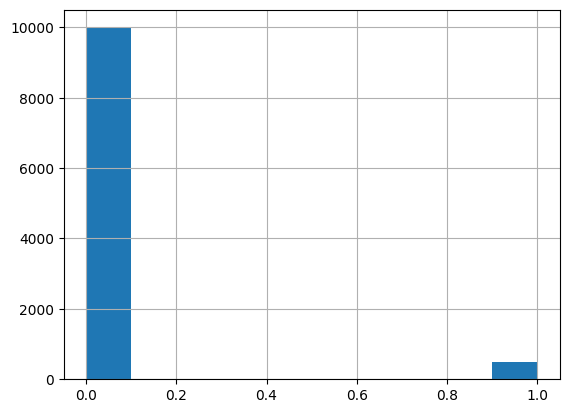

In [120]:
card['Class'].hist()

In [121]:
count = card['Class'].value_counts()
count

0    10000
1      492
Name: Class, dtype: int64

---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [122]:
X = card.drop('Class', axis=1)  #entrada
y = card[['Class']] #alvo

---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados.
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

In [123]:
from sklearn.utils import resample

<Axes: >

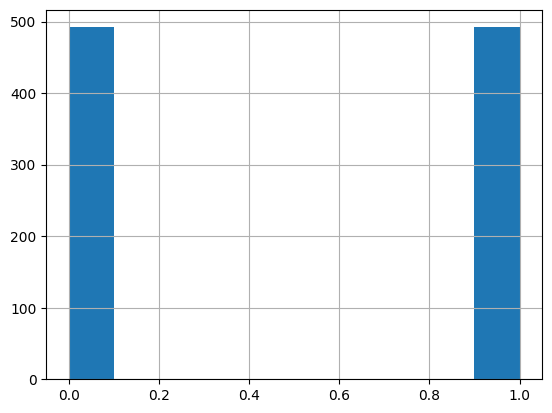

In [124]:
classe_majoritaria = card[card['Class'] == 0]
classe_minoritaria = card[card['Class'] == 1]

subamostragem = resample(classe_majoritaria,
                         replace=False,
                         n_samples=len(classe_minoritaria))

subamostragem = pd.concat([subamostragem, classe_minoritaria])

subamostragem['Class'].hist()

---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados.

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

In [125]:
from imblearn.over_sampling import RandomOverSampler

array([[<Axes: title={'center': 'Class'}>]], dtype=object)

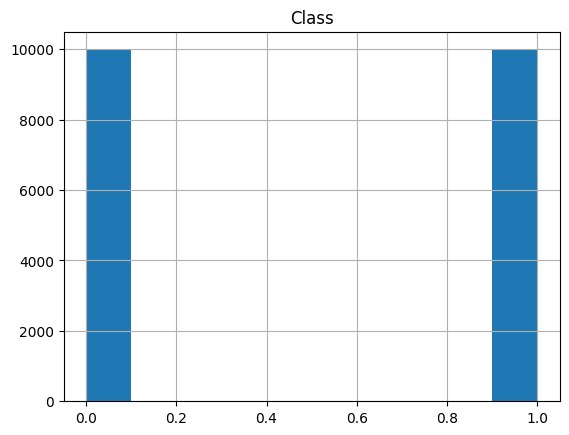

In [126]:
imputer = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = imputer.fit_resample(X, y)

superamostragem = y_resampled
superamostragem.hist()

---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

In [127]:
card['Class'].count() / 3

3497.3333333333335

<Axes: >

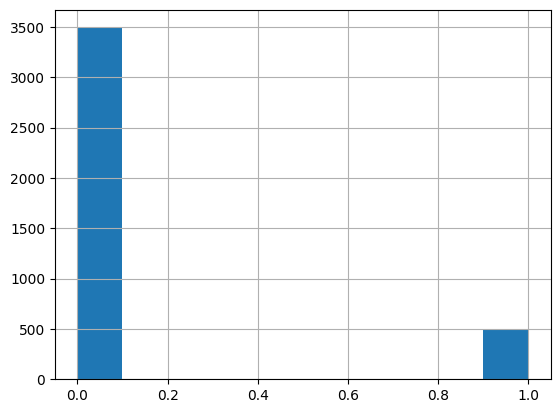

In [128]:
classe_majoritaria = card[card['Class'] == 0]
classe_minoritaria = card[card['Class'] == 1]

subamostragem = resample(classe_majoritaria,
                      replace=False,
                      n_samples=int(card['Class'].count() / 3))

subamostragem = pd.concat([subamostragem, classe_minoritaria])

subamostragem['Class'].hist()

<Axes: >

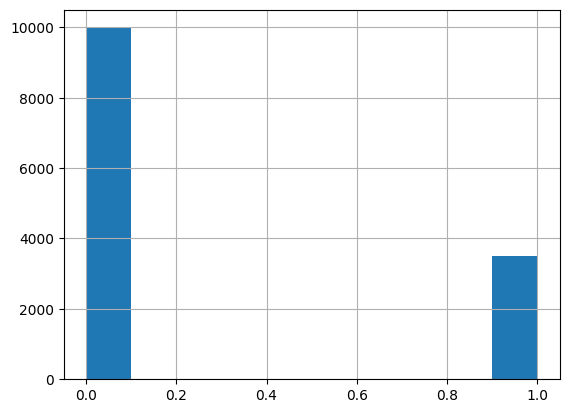

In [129]:
sampling_strategy_dict = {1: int(card['Class'].count() / 3)}

imputer = RandomOverSampler(sampling_strategy= sampling_strategy_dict)
X_resampled, y_resampled = imputer.fit_resample(X, y)

superamostragem = pd.concat([X_resampled, y_resampled], axis=1)
superamostragem['Class'].hist()


<Axes: >

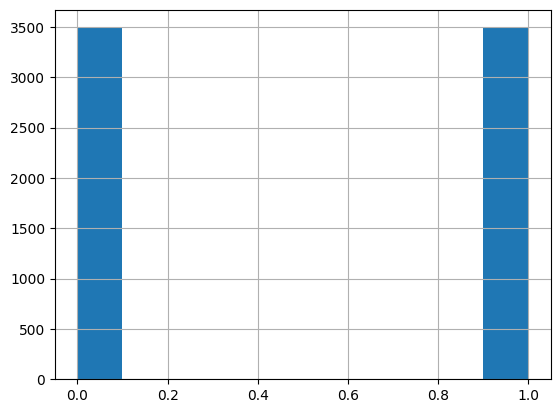

In [130]:
amostragem = subamostragem[subamostragem['Class'] == 0]
aux = superamostragem = superamostragem[superamostragem['Class'] == 1]

amostragem = pd.concat([amostragem, superamostragem], ignore_index=True)
amostragem['Class'].hist()